### Raw Data EDA

In [1]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns

In [2]:
test_data = pd.read_csv('exoTest.csv')
train_data = pd.read_csv('exoTrain.csv')

In [3]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [5]:
train_data.isna().values.sum()

np.int64(0)

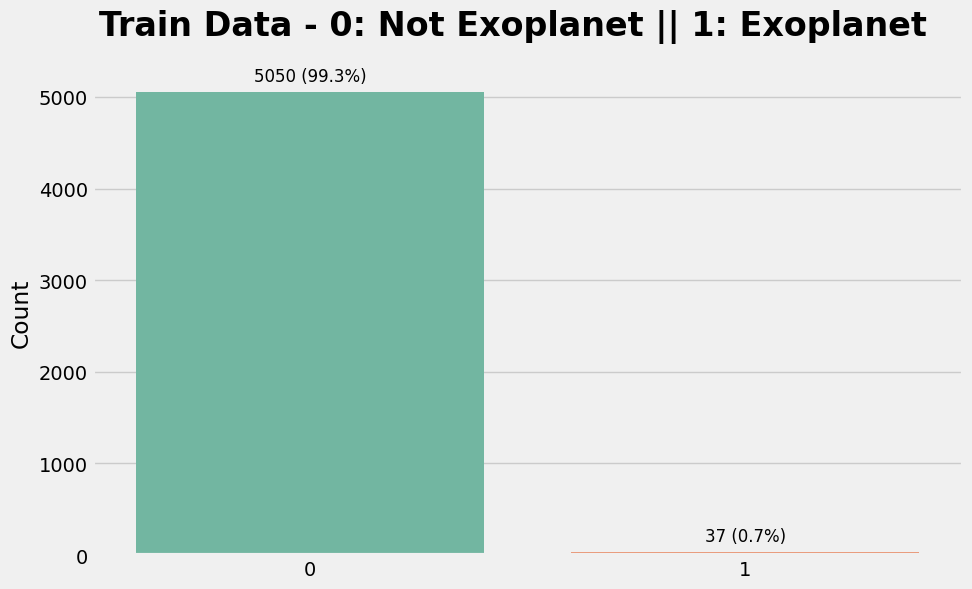

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

# Calculate counts and percentages
class_counts = train_data['LABEL'].value_counts().sort_index()
total = class_counts.sum()
percentages = (class_counts / total * 100).round(1)

# Plot countplot
bars = sns.countplot(x='LABEL', data=train_data, palette="Set2", ax=ax)

# Manually loop through each bar and label
for bar, count, percent in zip(bars.patches, class_counts, percentages):
    height = bar.get_height()
    ax.annotate(f'{count} ({percent}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=12)

# Title and axis labels
fig.suptitle('Train Data - 0: Not Exoplanet || 1: Exoplanet', fontsize=24, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Count')

plt.show()


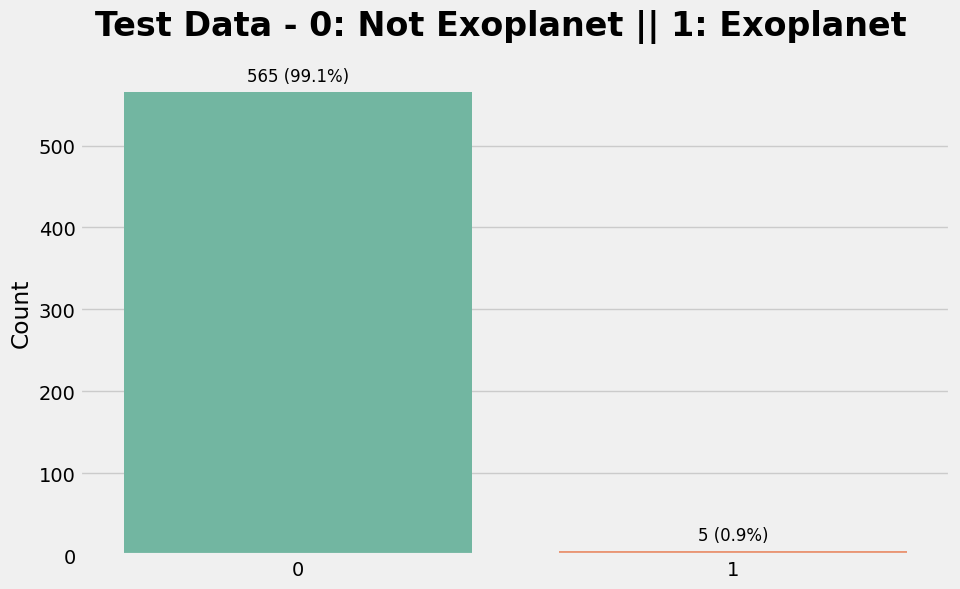

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

# Calculate counts and percentages
class_counts = test_data['LABEL'].value_counts().sort_index()
total = class_counts.sum()
percentages = (class_counts / total * 100).round(1)

# Plot countplot
bars = sns.countplot(x='LABEL', data=test_data, palette="Set2", ax=ax)

# Manually loop through each bar and label
for bar, count, percent in zip(bars.patches, class_counts, percentages):
    height = bar.get_height()
    ax.annotate(f'{count} ({percent}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=12)

# Title and axis labels
fig.suptitle('Test Data - 0: Not Exoplanet || 1: Exoplanet', fontsize=24, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Count')

plt.show()


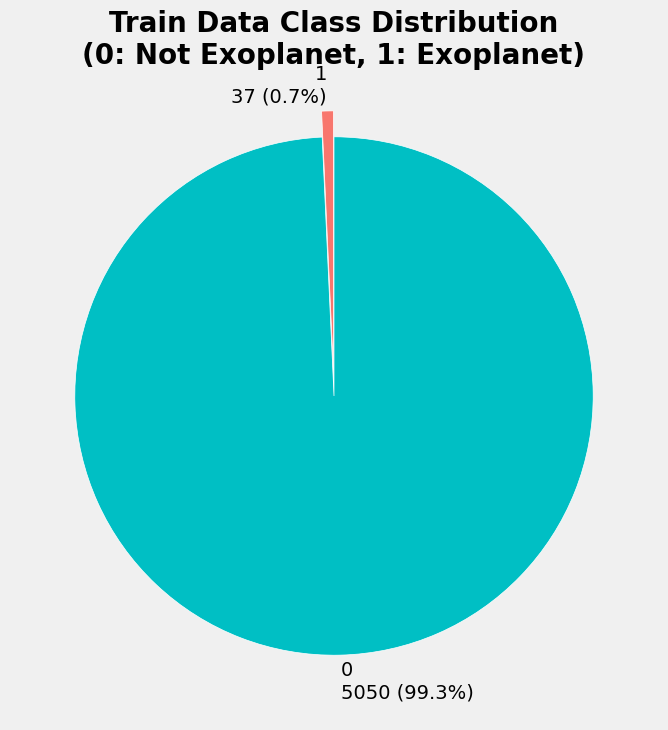

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

# Get counts
class_counts = train_data['LABEL'].value_counts().sort_index()
total = class_counts.sum()

# Pretty color palette
colors = ['#00BFC4', '#F8766D']  # Teal and Orange (professional + clean)

# Labels: show number and percentage together
labels = [f'{label}\n{count} ({(count/total*100):.1f}%)' for label, count in zip(class_counts.index, class_counts)]

# Plot pie chart
ax.pie(class_counts,
       labels=labels,
       colors=colors,
       explode=[0, 0.1],  # Small explode for exoplanet slice
       autopct=None,      # We handle custom labels manually
       startangle=90,
       counterclock=False,
       wedgeprops={'edgecolor': 'white'})

# Title
ax.set_title('Train Data Class Distribution\n(0: Not Exoplanet, 1: Exoplanet)', fontsize=20, fontweight='bold')

plt.show()


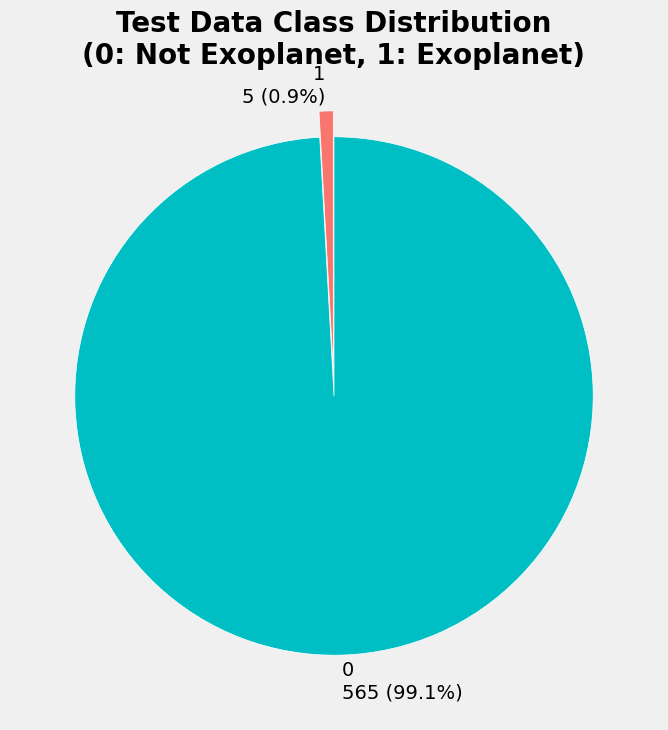

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

# Get counts
class_counts = test_data['LABEL'].value_counts().sort_index()
total = class_counts.sum()

# Pretty color palette
colors = ['#00BFC4', '#F8766D']  # Teal and Orange (professional + clean)

# Labels: show number and percentage together
labels = [f'{label}\n{count} ({(count/total*100):.1f}%)' for label, count in zip(class_counts.index, class_counts)]

# Plot pie chart
ax.pie(class_counts,
       labels=labels,
       colors=colors,
       explode=[0, 0.1],  # Small explode for exoplanet slice
       autopct=None,      # We handle custom labels manually
       startangle=90,
       counterclock=False,
       wedgeprops={'edgecolor': 'white'})

# Title
ax.set_title('Test Data Class Distribution\n(0: Not Exoplanet, 1: Exoplanet)', fontsize=20, fontweight='bold')

plt.show()


,LABEL,Count
0,0,5050
1,1,37


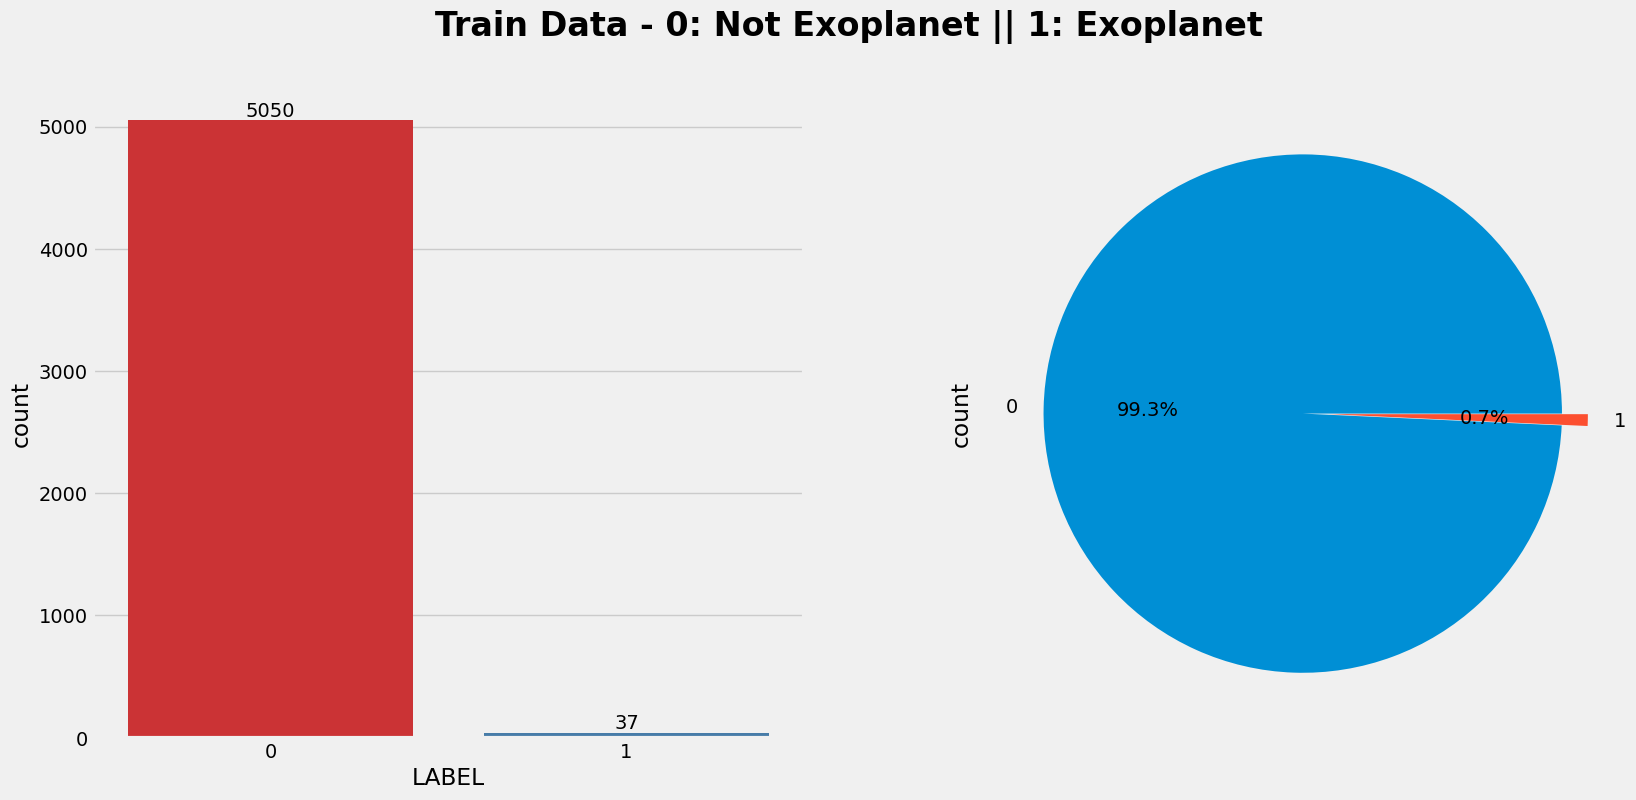

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(x = 'LABEL', data=train_data, palette = "Set1", ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
train_data['LABEL'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[1])
fig.suptitle('Train Data - 0: Not Exoplanet || 1: Exoplanet\n', fontsize = 24, fontweight = 'bold')
class_counts = train_data['LABEL'].value_counts().reset_index()
class_counts.columns = ['LABEL', 'Count']
class_counts

,LABEL,Count
0,0,565
1,1,5


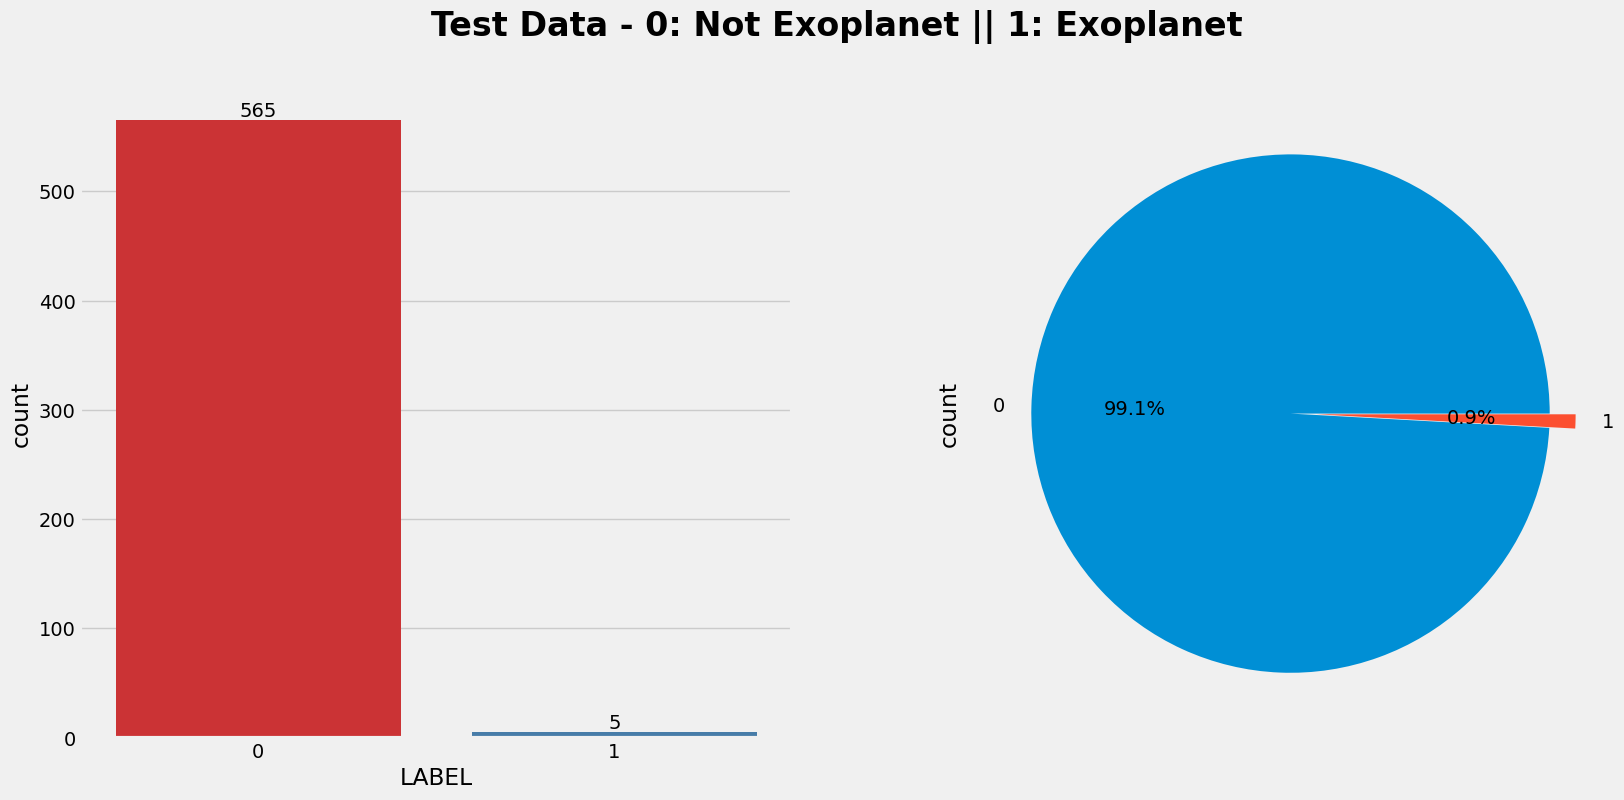

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(x = 'LABEL', data=test_data, palette = "Set1", ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].bar_label(ax[0].containers[1])
test_data['LABEL'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[1])
fig.suptitle('Test Data - 0: Not Exoplanet || 1: Exoplanet\n', fontsize = 24, fontweight = 'bold')
class_counts = test_data['LABEL'].value_counts().reset_index()
class_counts.columns = ['LABEL', 'Count']
class_counts

In [11]:
train_y=train_data[train_data['LABEL'] == 1]
train_n=train_data[train_data['LABEL'] < 1]
train_t_n=train_n.iloc[:,1:].T
train_t_y=train_y.iloc[:,1:].T
train_t_y.head(1)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.1,9.34,238.77,-103.54,-265.91,...,124.39,-63.5,31.29,-472.5,194.82,26.96,43.07,-248.23,22.82,26.24


In [21]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=("Flux variation of star 5086", "Flux variation of star 3001"))

fig.add_trace(
    go.Scatter(y=train_t_n[5086], x=train_t_n.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[3001], x=train_t_n.index),
    row=1, col=2
)

fig.update_layout(height=400, width=800, title_text="Non Exoplanets Star Examples", showlegend=False)
fig.show()


In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Flux variation of star 1", "Flux variation of star 35"))

fig.add_trace(
    go.Scatter(y=train_t_y[1], x=train_t_y.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[35], x=train_t_y.index),
    row=1, col=2
)

fig.update_layout(height=400, width=800, title_text="Exoplanets Stars Examples", showlegend=False)

fig.show()



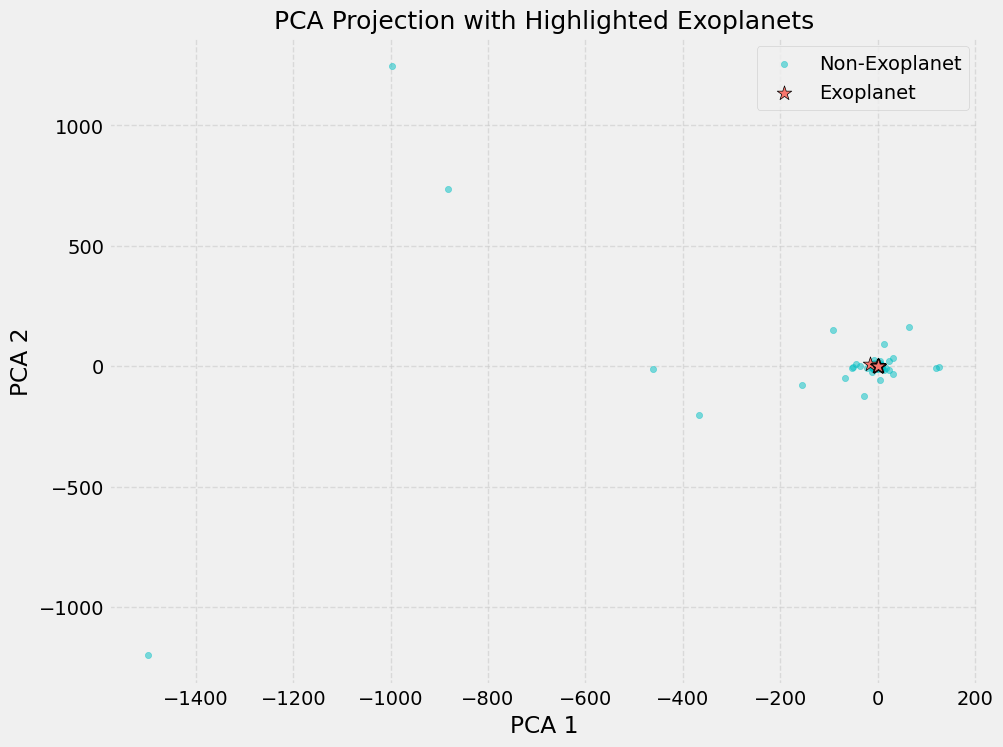

In [76]:
X = train_data.iloc[:,1:].values
y = train_data['LABEL']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

colors = ['#00BFC4', '#F8766D'] 


plt.figure(figsize=(10,8))

# Plot non-exoplanets
plt.scatter(X_pca[y==0,0], X_pca[y==0,1], c=colors[0], label='Non-Exoplanet', s=20, alpha=0.5)

# Plot exoplanets bigger
plt.scatter(X_pca[y==1,0], X_pca[y==1,1], c=colors[1], marker='*', label='Exoplanet', s=120, edgecolors='k')

plt.title('PCA Projection with Highlighted Exoplanets', fontsize=18)
plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


What the PCA plot shows:
 - Each dot represents one star (an observation).
 - The x and y axes are the first two principal components.
 - Red dots (LABEL = 0) represent non-exoplanets, blue dots (LABEL = 1) represent exoplanets.
 - Most points are colored red, indicating a strong class imbalance (very few exoplanets).

Observations:
 - Most stars cluster tightly around (0, 0), suggesting that they are very similar in behavior.
 - A few points are far from the cluster, indicating potential outliers.
 - There is no obvious separation between exoplanets and non-exoplanets in this 2D PCA space.
 - The variance captured by the first two components does not seem to highlight class differences.

Possible reasons:
 - Class imbalance: exoplanets are very rare compared to non-exoplanets.
 - The first two principal components capture overall variance, not necessarily variance that separates the two classes.
 - Extreme outliers dominate the variance, masking finer structures.
 - Raw flux values may not be the best features for exoplanet detection without additional processing.

In [54]:
import scipy.stats as stats

# Create new statistical features
star_stats = pd.DataFrame()
star_stats['mean_flux'] = train_data.iloc[:,1:].mean(axis=1)
star_stats['std_flux'] = train_data.iloc[:,1:].std(axis=1)
star_stats['min_flux'] = train_data.iloc[:,1:].min(axis=1)
star_stats['max_flux'] = train_data.iloc[:,1:].max(axis=1)
star_stats['skewness'] = train_data.iloc[:,1:].skew(axis=1)
star_stats['kurtosis'] = train_data.iloc[:,1:].kurtosis(axis=1)
star_stats['label'] = train_data['LABEL']

# Display a table
star_stats.head()


,mean_flux,std_flux,min_flux,max_flux,skewness,kurtosis,label
0,10.000981,160.700325,-1053.97,504.46,0.003772,0.411350,1
1,-7.406854,60.004100,-371.27,252.64,-2.274900,10.065876,1
2,8.274627,281.829860,-874.95,1274.59,0.358039,2.205886,1
3,-4.612868,103.224056,-268.41,370.29,-0.005058,-0.027207,1
4,-14.108963,407.062124,-1808.76,924.32,-0.528151,0.147308,1
